# Relatório de Análise 8

## Identificando e removendo outliers

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [5]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

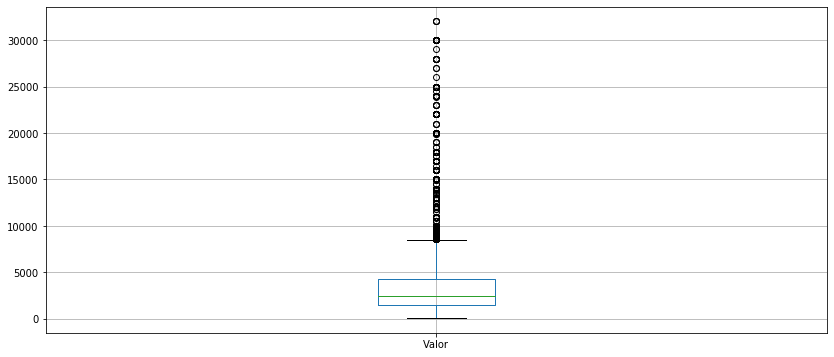

In [6]:
dados.boxplot(['Valor'])

In [9]:
dados[dados['Valor'] >= 100000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Tipo agregado


In [10]:
valor = dados['Valor'] 

<img src = 'compressed_box-plot.png' width=70%>

In [16]:
Q1 = valor.quantile(.25)
Q1

1500.0

In [13]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [14]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122401dd0>]],
      dtype=object)

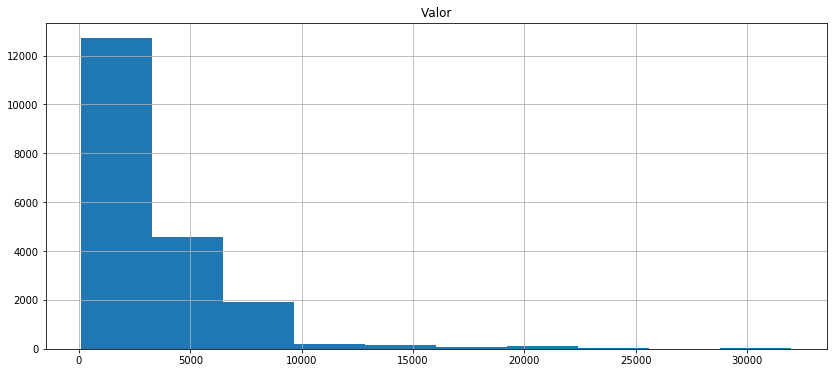

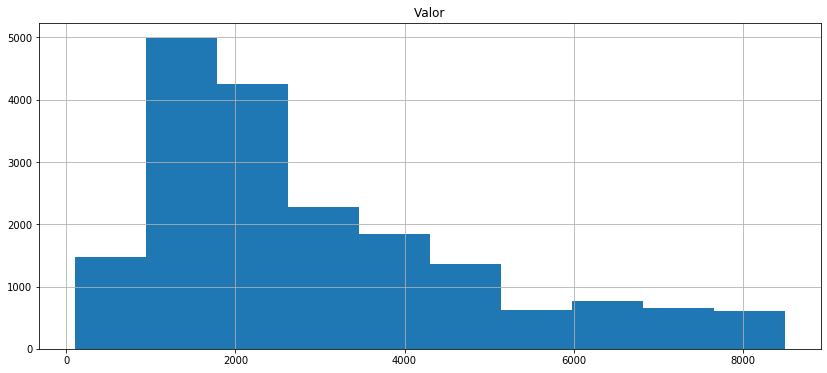

In [15]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

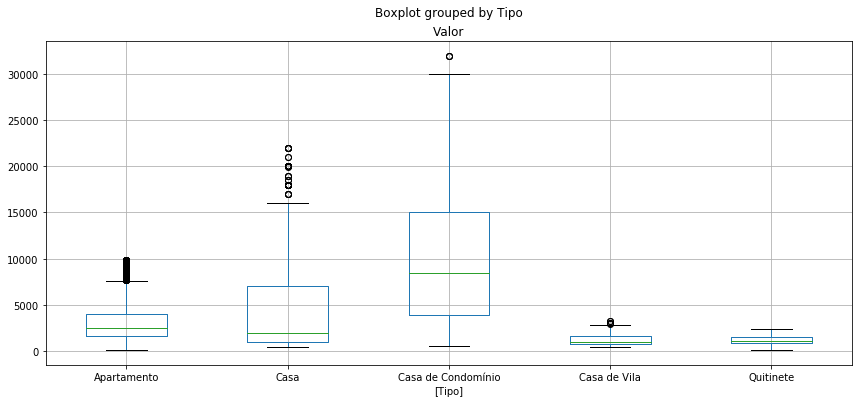

In [19]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [21]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [22]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [23]:
grupo_tipo.groups

{'Apartamento': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920, 16921,
             16922],
            dtype='int64', length=16923),
 'Casa': Int64Index([16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931,
             16932,
             ...
             17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819,
             17820],
            dtype='int64', length=898),
 'Casa de Condomínio': Int64Index([17821, 17822, 17823, 17824, 17825, 17826, 17827, 17828, 17829,
             17830,
             ...
             18775, 18776, 18777, 18778, 18779, 18780, 18781, 18782, 18783,
             18784],
            dtype='int64', length=964),
 'Casa de Vila': Int64Index([18785, 18786, 18787, 18788, 18789, 18790, 18791, 18792, 18793,
             18794,
             ...
             19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016

In [24]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
Q1

Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [26]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Casa de Vila           1600.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [27]:
limite_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [28]:
limite_superior

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [29]:
limite_superior['Apartamento']

7600.0

In [30]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [31]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [32]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

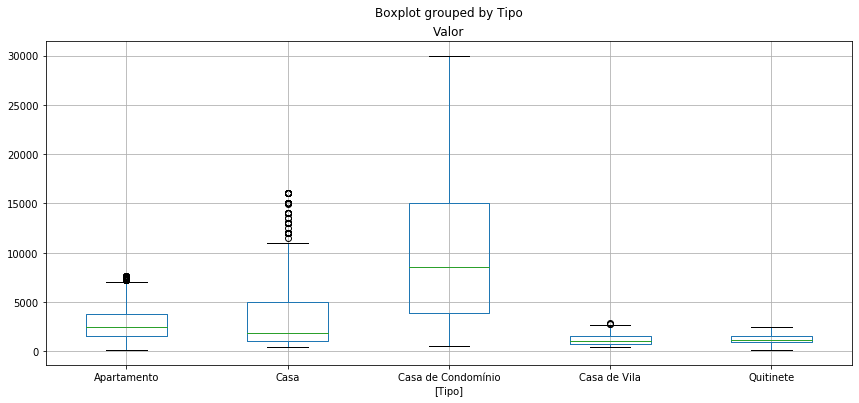

In [33]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [34]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)